In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
import numpy as np
from matplotlib import rc

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import os.path as path
import matplotlib.ticker as ticker
from scipy.integrate import simps, trapz

import matplotlib as mpl
mpl.rcParams.update({
    'font.family' : 'STIXGeneral',
    'mathtext.fontset' : 'stix',
    'xtick.direction' : 'in' ,
    'xtick.labelsize' : 17.5 ,
    'xtick.top' : True ,
    'xtick.major.width' : 1.5,
    'xtick.major.size' : 6,
    'ytick.direction' : 'in' ,
    'ytick.labelsize' : 17.5 ,
    'ytick.right' : True ,
    'ytick.major.width' : 1.5,
    'ytick.major.size' : 6,
    'axes.labelsize' : 18,
    'legend.frameon' : False,
    'legend.fontsize' : 13,
    'legend.handlelength' : 1.5,
    'savefig.dpi' : 600, 
    'savefig.bbox' : 'tight',
    'axes.linewidth' : 1.5,
})
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# frequency information: histogram, cumulant histogram

# Data: NRG, ED

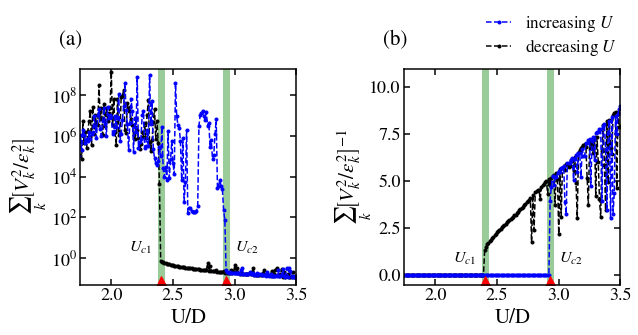

In [490]:
ax0 = plt.axes((0.0, 0.0, 0.5, 0.75), xticks = [], \
    yticks = [], facecolor = 'None', frameon = True)
ax1 = plt.axes((0.75, 0.0, 0.5, 0.75), xticks = [], \
    yticks = [], facecolor = 'None', frameon = True)

ax0.axvline(U_c1_ed, c = '#99CC99', lw = '7')
ax0.axvline(U_c2_ed, c = '#99CC99', lw = '7')
ax0.annotate(r'$U_{c1}$', xy=(0.28, 0.15), xycoords = 'axes fraction', fontsize=16, ha='center')
ax0.annotate(r'$U_{c2}$', xy=(0.77, 0.15), xycoords = 'axes fraction', fontsize=16, ha='center')
ax0.plot(U2_ed, im, '.--', c='k', label=r'decreasing $U$')
ax0.plot(U1_ed, mi, '.--', c='b', label=r'increasing $U$')
ax0.plot(np.array([U_c1_ed, U_c2_ed]), np.ones(2)*0.06, 'r^', ms=15)
ax0.set_ylim(0.05, 2e9)
ax0.set_yscale('log')
ax0.set_xlim(1.75, 3.5)
ax0.set_xticks([2.0, 2.5, 3.0, 3.5])
ax0.tick_params(labelsize=18)
ax0.set_ylabel(r'$\sum_k \left[{V_k^2}/{\epsilon_k^2}\right]$', labelpad=2, fontsize=21)
ax0.set_xlabel('U/D', fontsize=21)

ax1.axvline(U_c1_ed, c = '#99CC99', lw = '7')
ax1.axvline(U_c2_ed, c = '#99CC99', lw = '7')
ax1.annotate(r'$U_{c1}$', xy=(0.28, 0.1), xycoords = 'axes fraction', fontsize=16, ha='center')
ax1.annotate(r'$U_{c2}$', xy=(0.77, 0.1), xycoords = 'axes fraction', fontsize=16, ha='center')
ax1.plot(U2_ed, 1/im, '.--', c='k', label=r'decreasing $U$')
ax1.plot(U1_ed, 1/mi, '.--', c='b', label=r'increasing $U$')
ax1.plot(np.array([U_c1_ed, U_c2_ed]), np.ones(2)*-0.4, 'r^', ms=15)
ax1.set_ylim(-0.5, 11)
ax1.set_xlim(1.75, 3.5)
ax1.set_yticks([0.0, 2.5, 5.0, 7.5, 10.0])
handles,labels = ax1.get_legend_handles_labels()
ax1.legend([handles[1], handles[0]], [labels[1], labels[0]],bbox_to_anchor=(0.68, 1.15), \
           loc='center', labelspacing=0.2, fontsize=17)
ax1.set_xticks([2.0, 2.5, 3.0, 3.5])
ax1.tick_params(labelsize=18)
ax1.set_ylabel(r'$\sum_k \left[{V_k^2}/{\epsilon_k^2}\right]^{-1}$', labelpad=-5, fontsize=21)
ax1.set_xlabel('U/D', fontsize=21)

plt.gcf().text(0.0-0.05, 0.83, '(a)', fontsize = 21)
plt.gcf().text(0.75-0.05, 0.83, '(b)', fontsize = 21)
#plt.savefig('fig5.pdf')

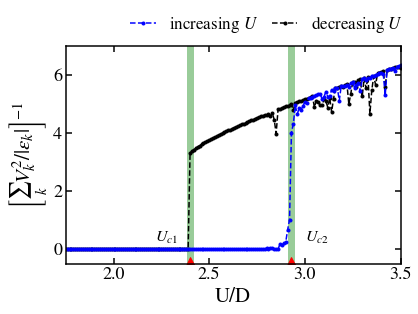

In [11]:
def S2(e, V):
    mask = np.ones(len(e))
    zero, zeropos = np.min(np.abs(V)), np.argmin(np.abs(V))
    return 1/np.sum((V**2/np.abs(e)))

beta = 100
directory1 = '../1_dmftsolver/ED/nb5/bethe'
directory2 = '../1_dmftsolver/ED/nb5/bethe'
up_num = 211
dn_num = 211
U1_ed = np.zeros(up_num, dtype = 'float64')
U2_ed = np.zeros(dn_num, dtype = 'float64')
U_c1_ed, U_c2_ed = 2.4, 2.93

U = np.array([0.01*i for i in range(50, 501)])
n = 0
for i, u in enumerate(U):
    if path.isfile(f'{directory1}/m_to_i/checkpoint_{u:.2f}')==False: continue
    U1_ed[n] = u
    n += 1
n = 0
for i, u in enumerate(U):
    if path.isfile(f'{directory2}/i_to_m/checkpoint_{u:.2f}')==False: continue
    U2_ed[n] = u
    n += 1

mi = np.zeros((len(U1_ed)), dtype = 'float64')
im = np.zeros((len(U2_ed)), dtype = 'float64')
mi_V0 = np.zeros((len(U1_ed)), dtype = 'float64')
im_V0 = np.zeros((len(U2_ed)), dtype = 'float64')
for i,u in enumerate(U1_ed):
    a = np.loadtxt(f'{directory1}/m_to_i/checkpoint_{u:.2f}', dtype = 'float64')
    e,V = a[:int(len(a)/2)], a[int(len(a)/2):]
    mi[i] = S2(e,V)
for i,u in enumerate(U2_ed):
    a = np.loadtxt(f'{directory2}/i_to_m/checkpoint_{u:.2f}', dtype = 'float64')
    e,V = a[:int(len(a)/2)], a[int(len(a)/2):]
    im[i] = S2(e,V)
    
    
bethe_U1 = U1_ed
bethe_U2 = U2_ed
bethe_mi = mi
bethe_im = im


plt.axvline(U_c1_ed, c = '#99CC99', lw = '7')
plt.axvline(U_c2_ed, c = '#99CC99', lw = '7')
plt.annotate(r'$U_{c1}$', xy=(0.30, 0.1), xycoords = 'axes fraction', fontsize=16, ha='center')
plt.annotate(r'$U_{c2}$', xy=(0.75, 0.1), xycoords = 'axes fraction', fontsize=16, ha='center')
plt.plot(U2_ed, im, '.--', c='k', label=r'decreasing $U$')
plt.plot(U1_ed, mi, '.--', c='b', label=r'increasing $U$')
plt.plot(np.array([U_c1_ed, U_c2_ed]), np.ones(2)*-0.5, 'r^', ms=15)
plt.ylim(-0.5, 7)
plt.xlim(1.75, 3.5)
ax = plt.gca()
handles,labels = ax.get_legend_handles_labels()
ax.legend([handles[1], handles[0]], [labels[1], labels[0]],bbox_to_anchor=(0.6, 1.1), \
           loc='center', ncol=2, columnspacing = 0.8, fontsize=17)
ax.set_xticks([2.0, 2.5, 3.0, 3.5])
ax.set_yticks([0.0, 2.0, 4.0, 6.0])
ax.tick_params(labelsize=18)
ax.set_ylabel(r'$\left[\sum_k {V_k^2}/{|\epsilon_k|}\right]^{-1}$', fontsize=21)
ax.set_xlabel('U/D', fontsize=21)

#plt.savefig('fig5.pdf')

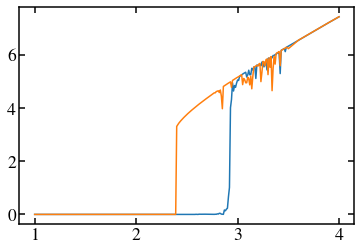

In [102]:
def S2(e, V):
    mask = np.ones(len(e))
    zero, zeropos = np.min(np.abs(V)), np.argmin(np.abs(V))
    return 1/np.sum((V**2/np.abs(e)))
def M(e, V):
    mask = np.ones(len(e))
    zero, zeropos = np.min(np.abs(e)), np.argmin(np.abs(e))
    #if zero < 3e-2: mask[zeropos] = 0
    
    VV = V[mask>0.5]
    return np.sum(VV**2)

beta = 100
directory1 = '../1_dmftsolver/ED/nb5/bethe'
directory2 = '../1_dmftsolver/ED/nb5/bethe'
up_num = 211
dn_num = 211
U1_ed = np.zeros(up_num, dtype = 'float64')
U2_ed = np.zeros(dn_num, dtype = 'float64')
U_c1_ed, U_c2_ed = 2.4, 2.93

U = np.array([0.01*i for i in range(50, 501)])
n = 0
for i, u in enumerate(U):
    if path.isfile(f'{directory1}/m_to_i/checkpoint_{u:.2f}')==False: continue
    U1_ed[n] = u
    n += 1
n = 0
for i, u in enumerate(U):
    if path.isfile(f'{directory2}/i_to_m/checkpoint_{u:.2f}')==False: continue
    U2_ed[n] = u
    n += 1

mi = np.zeros((len(U1_ed)), dtype = 'float64')
im = np.zeros((len(U2_ed)), dtype = 'float64')
for i,u in enumerate(U1_ed):
    a = np.loadtxt(f'{directory1}/m_to_i/checkpoint_{u:.2f}', dtype = 'float64')
    e, V = a[:int(len(a)/2)], a[int(len(a)/2):]
    mi[i] = S2(e,V)
for i,u in enumerate(U2_ed):
    a = np.loadtxt(f'{directory2}/i_to_m/checkpoint_{u:.2f}', dtype = 'float64')
    e, V = a[:int(len(a)/2)], a[int(len(a)/2):]
    im[i] = S2(e,V)
    
    
bethe_U1 = U1_ed
bethe_U2 = U2_ed
bethe_mi = mi
bethe_im = im

plt.plot(U1_ed, mi)
plt.plot(U2_ed, im)

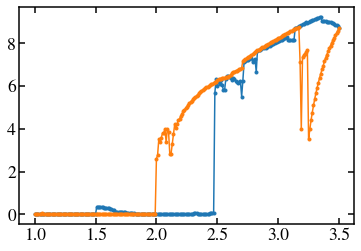

In [105]:
beta = 100
directory1 = '../1_dmftsolver/ED/nb7/sc'
directory2 = '../1_dmftsolver/ED/nb7/sc'
up_num = 251
dn_num = 251
U1_ed = np.zeros(up_num, dtype = 'float64')
U2_ed = np.zeros(dn_num, dtype = 'float64')
U_c1_ed, U_c2_ed = 2.4, 2.93

U = np.array([0.01*i for i in range(50, 501)])
n = 0
for i, u in enumerate(U):
    if path.isfile(f'{directory1}/m_to_i/checkpoint_{u:.2f}')==False: continue
    U1_ed[n] = u
    n += 1
n = 0
for i, u in enumerate(U):
    if path.isfile(f'{directory2}/i_to_m/checkpoint_{u:.2f}')==False: continue
    U2_ed[n] = u
    n += 1

mi = np.zeros((len(U1_ed)), dtype = 'float64')
im = np.zeros((len(U2_ed)), dtype = 'float64')
for i,u in enumerate(U1_ed):
    a = np.loadtxt(f'{directory1}/m_to_i/checkpoint_{u:.2f}', dtype = 'float64')
    e,V = a[:int(len(a)/2)], a[int(len(a)/2):]
    mi[i] = S2(e,V)
for i,u in enumerate(U2_ed):
    a = np.loadtxt(f'{directory2}/i_to_m/checkpoint_{u:.2f}', dtype = 'float64')
    e,V = a[:int(len(a)/2)], a[int(len(a)/2):]
    im[i] = S2(e,V)
    
    
sc_U1 = U1_ed
sc_U2 = U2_ed
sc_mi = mi
sc_im = im

plt.plot(U1_ed, mi, '.-')
plt.plot(U2_ed, im, '.-')

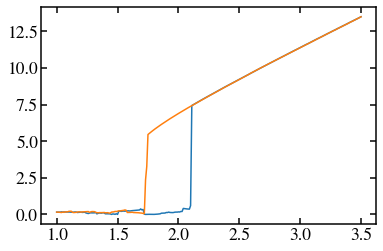

In [107]:
beta = 100
directory1 = '../1_dmftsolver/ED/nb7/bcc'
directory2 = '../1_dmftsolver/ED/nb7/bcc'
up_num = 251
dn_num = 251
U1_ed = np.zeros(up_num, dtype = 'float64')
U2_ed = np.zeros(dn_num, dtype = 'float64')
U_c1_ed, U_c2_ed = 2.4, 2.93

U = np.array([0.01*i for i in range(50, 501)])
n = 0
for i, u in enumerate(U):
    if path.isfile(f'{directory1}/m_to_i/checkpoint_{u:.2f}')==False: continue
    U1_ed[n] = u
    n += 1
n = 0
for i, u in enumerate(U):
    if path.isfile(f'{directory2}/i_to_m/checkpoint_{u:.2f}')==False: continue
    U2_ed[n] = u
    n += 1

mi = np.zeros((len(U1_ed)), dtype = 'float64')
im = np.zeros((len(U2_ed)), dtype = 'float64')
for i,u in enumerate(U1_ed):
    a = np.loadtxt(f'{directory1}/m_to_i/checkpoint_{u:.2f}', dtype = 'float64')
    e,V = a[:int(len(a)/2)], a[int(len(a)/2):]
    mi[i] = S2(e,V)
for i,u in enumerate(U2_ed):
    a = np.loadtxt(f'{directory2}/i_to_m/checkpoint_{u:.2f}', dtype = 'float64')
    e,V = a[:int(len(a)/2)], a[int(len(a)/2):]
    im[i] = S2(e,V)
    
    
bcc_U1 = U1_ed
bcc_U2 = U2_ed
bcc_mi = mi
bcc_im = im

plt.plot(U1_ed, mi)
plt.plot(U2_ed, im)

In [400]:
def bdos(z):
    a = np.sign(-z+1)
    return -2/np.pi*(z-1j*np.sqrt(1-z**2)*np.sign(z.imag))

x = np.linspace(-1.0, 1.0, num=2001, endpoint=True)+1e-20*1j
dosi = np.zeros(len(x))

for i, ww in enumerate(x):
    dosi[i] = bdos(ww).imag


w_sc, dos_sc = np.loadtxt('../1_dmftsolver/ED/dos/sc_dos', unpack=True, dtype='float64')
w_bcc, dos_bcc = np.loadtxt('../1_dmftsolver/ED/dos/bcc_dos', unpack=True, dtype='float64')
w_bethe, dos_bethe = x.real, dosi

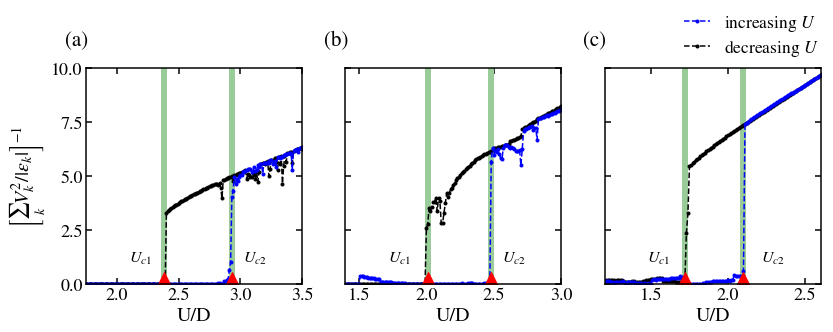

In [111]:
a,b = -0.05, -0.04
ax0 = plt.axes((0.0, 0.0, 0.5, 0.75), xticks = [], \
    yticks = [], facecolor = 'None', frameon = True)
ax1 = plt.axes((0.6, 0.0, 0.5, 0.75), xticks = [], \
    yticks = [], facecolor = 'None', frameon = True)
ax2 = plt.axes((1.2, 0.0, 0.5, 0.75), xticks = [], \
    yticks = [], facecolor = 'None', frameon = True)

ax0.axvline(2.38, c = '#99CC99', lw = '6'), ax0.axvline(2.93, c = '#99CC99', lw = '6')
ax0.plot(bethe_U2, bethe_im, 'ko--', ms=3, label = r'decreasing $U$')
ax0.plot(bethe_U1, bethe_mi, 'bo--', ms=3, label = r'increasing $U$')
ax0.annotate(r'$U_{c1}$', xy=(0.25, 0.1), xycoords = 'axes fraction', fontsize=16, ha='center')
ax0.annotate(r'$U_{c2}$', xy=(0.78, 0.1), xycoords = 'axes fraction', fontsize=16, ha='center')
ax0.plot(np.array([2.38, 2.93]), np.zeros(2), 'r^', ms=24)
ax0.set_ylim(0, 10)
ax0.set_xlim(1.75,3.5)

UU1, UU2 = 2.01, 2.48
ax1.axvline(UU1, c = '#99CC99', lw = '6'), ax1.axvline(UU2, c = '#99CC99', lw = '6')
ax1.plot(sc_U2, sc_im, 'ko--', ms=3, label = r'decreasing $U$')
ax1.plot(sc_U1, sc_mi, 'bo--', ms=3, label = r'increasing $U$')
ax1.annotate(r'$U_{c1}$', xy=(0.25, 0.1), xycoords = 'axes fraction', fontsize=16, ha='center')
ax1.annotate(r'$U_{c2}$', xy=(0.78, 0.1), xycoords = 'axes fraction', fontsize=16, ha='center')
ax1.plot(np.array([UU1, UU2]), np.zeros(2), 'r^', ms=24)
ax1.set_ylim(0, 10)
ax1.set_xlim(1.4,3.0)

UU1, UU2 = 1.72, 2.1
ax2.axvline(UU1, c = '#99CC99', lw = '6'), ax2.axvline(UU2, c = '#99CC99', lw = '6')
ax2.plot(bcc_U2, bcc_im, 'ko--', ms=3, label = r'decreasing $U$')
ax2.plot(bcc_U1, bcc_mi, 'bo--', ms=3, label = r'increasing $U$')
ax2.annotate(r'$U_{c1}$', xy=(0.25, 0.1), xycoords = 'axes fraction', fontsize=16, ha='center')
ax2.annotate(r'$U_{c2}$', xy=(0.78, 0.1), xycoords = 'axes fraction', fontsize=16, ha='center')
ax2.plot(np.array([UU1, UU2]), np.zeros(2), 'r^', ms=24)
ax2.set_ylim(0, 10)
ax2.set_xlim(1.2,2.6)


ax0.set_xticks([2.0, 2.5, 3.0, 3.5])
ax1.set_xticks([1.5, 2.0, 2.5, 3.0])
ax2.set_xticks([1.5, 2.0, 2.5])
ax0.set_yticks([0.0, 2.5, 5.0, 7.5, 10.0])
ax1.set_yticks([0.0, 2.5, 5.0, 7.5, 10.0])
ax2.set_yticks([0.0, 2.5, 5.0, 7.5, 10.0])
ax1.set_yticklabels([])
ax2.set_yticklabels([])
ax0.tick_params(labelsize=18)
ax1.tick_params(labelsize=18)
ax2.tick_params(labelsize=18)

ax0.set_ylabel(r'$\left[\sum_k {V_k^2}/{|\epsilon_k|}\right]^{-1}$', fontsize=20)
ax0.set_xlabel('U/D', fontsize=20)
ax1.set_xlabel('U/D', fontsize=20)
ax2.set_xlabel('U/D', fontsize=20)

handles,labels = ax2.get_legend_handles_labels()
ax2.legend([handles[1], handles[0]], [labels[1], labels[0]],bbox_to_anchor=(0.68, 1.15), \
           loc='center', labelspacing = 0.2, fontsize=17.5)

plt.gcf().text(0.0+a, 0.83, '(a)', fontsize = 21)
plt.gcf().text(0.6+a, 0.83, '(b)', fontsize = 21)
plt.gcf().text(1.2+a, 0.83, '(c)', fontsize = 21)

plt.savefig('fig6.pdf')

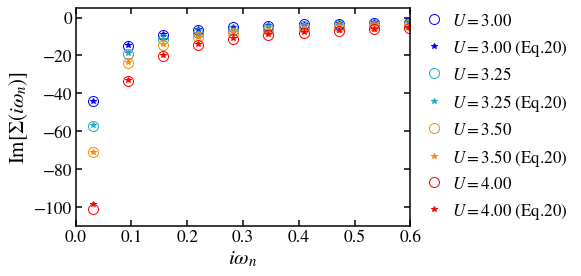

In [3]:
def S2(e, V):
    mask = np.ones(len(e))
    zero, zeropos = np.min(np.abs(e)), np.argmin(np.abs(e))
    if zero < 3e-2: mask[zeropos] = 0
    
    ee = e[mask>0.5]
    VV = V[mask>0.5]
    return np.sum(VV**2/ee**2)
def M(e, V):
    mask = np.ones(len(e))
    zero, zeropos = np.min(np.abs(e)), np.argmin(np.abs(e))
    if zero < 3e-2: mask[zeropos] = 0
    
    VV = V[mask<0.5]
    return np.sum(VV)

eqnum = 20
directory = '../1_dmftsolver/ED/nb5/bethe'
#omega = np.pi/100 * (2*np.arange(5000)+1)
omega, Giwr, Giwi = np.loadtxt(f'{directory}/m_to_i/Giw-3.00.dat', unpack = True, dtype = 'float64')
a = np.loadtxt(f'{directory}/m_to_i/checkpoint_3.00', dtype = 'float64')
e,V = a[:int(len(a)/2)], a[int(len(a)/2):]
Sigmar = 1j*omega + u/2 - 1/4*(Giwr+1j*Giwi) - 1/(Giwr+1j*Giwi)
Sigmae = -1/omega * S2(e,V)/(4*(S2(e,V)+M(e,V))**2)
plt.plot(omega, Sigmar.imag, 'bo', mfc='none', ms=10, label=r'$U=3.00$')
plt.plot(omega, Sigmae, 'b*', label=fr'$U=3.00$ (Eq.{eqnum:d})')

omega, Giwr, Giwi = np.loadtxt(f'{directory}/m_to_i/Giw-3.25.dat', unpack = True, dtype = 'float64')
a = np.loadtxt(f'{directory}/m_to_i/checkpoint_3.25', dtype = 'float64')
e,V = a[:int(len(a)/2)], a[int(len(a)/2):]
Sigmar = 1j*omega + u/2 - 1/4*(Giwr+1j*Giwi) - 1/(Giwr+1j*Giwi)
Sigmae = -1/omega * S2(e,V)/(4*(S2(e,V)+M(e,V))**2)
plt.plot(omega, Sigmar.imag, 'o', c='#24acbd', mfc='none', ms=10, label=r'$U=3.25$')
plt.plot(omega, Sigmae, '*', c='#24acbd', label=fr'$U=3.25$ (Eq.{eqnum:d})')

omega, Giwr, Giwi = np.loadtxt(f'{directory}/m_to_i/Giw-3.50.dat', unpack = True, dtype = 'float64')
a = np.loadtxt(f'{directory}/m_to_i/checkpoint_3.50', dtype = 'float64')
e,V = a[:int(len(a)/2)], a[int(len(a)/2):]
Sigmar = 1j*omega + u/2 - 1/4*(Giwr+1j*Giwi) - 1/(Giwr+1j*Giwi)
Sigmae = -1/omega * S2(e,V)/(4*(S2(e,V)+M(e,V))**2)
plt.plot(omega, Sigmar.imag, 'o', c='#f58d0f', mfc='none', ms=10, label=r'$U=3.50$')
plt.plot(omega, Sigmae, '*', c='#f58d0f', label=fr'$U=3.50$ (Eq.{eqnum:d})')

omega, Giwr, Giwi = np.loadtxt(f'{directory}/m_to_i/Giw-4.00.dat', unpack = True, dtype = 'float64')
a = np.loadtxt(f'{directory}/m_to_i/checkpoint_4.00', dtype = 'float64')
e,V = a[:int(len(a)/2)], a[int(len(a)/2):]
Sigmar = 1j*omega + u/2 - 1/4*(Giwr+1j*Giwi) - 1/(Giwr+1j*Giwi)
Sigmae = -1/omega * S2(e,V)/(4*(S2(e,V)+M(e,V))**2)
plt.plot(omega, Sigmar.imag, 'ro', mfc='none', ms=10, label=r'$U=4.00$')
plt.plot(omega, Sigmae, 'r*', label=fr'$U=4.00$ (Eq.{eqnum:d})')

plt.legend(bbox_to_anchor=(1.25, 0.5), loc='center', fontsize=17, handletextpad=0.3)
plt.xlim(0, 0.6)
plt.ylim(-110, 5)
plt.xlabel(r'$i\omega_n$', fontsize=21)
plt.ylabel(r'Im$[\Sigma(i\omega_n)]$', fontsize=21)

plt.savefig('fig7.pdf', bbox_inches='tight')

# Figure 2. Training flow & Test result

In [ ]:
ax00 = plt.axes((0.1+b, 0.51, 0.14, 0.14*1.5), xticks = [], \
    yticks = [], facecolor = 'w', frameon = True)
ax01 = plt.axes((0.7+b, 0.51, 0.14, 0.14*1.5), xticks = [], \
    yticks = [], facecolor = 'w', frameon = True)
ax02 = plt.axes((1.3+b, 0.51, 0.14, 0.14*1.5), xticks = [], \
    yticks = [], facecolor = 'w', frameon = True)
ax00.plot(w_bethe, dos_bethe, 'k-')
ax01.plot(w_sc, dos_sc, 'k-')
ax02.plot(w_bcc, dos_bcc, 'k-')
ax00.set_xlim(-1, 1)
ax01.set_xlim(-1, 1)
ax02.set_xlim(-1, 1)
ax00.set_ylim(0, 0.8)
ax01.set_ylim(0, 1.1)
ax02.set_ylim(0, 7)
ax00.set_ylabel(r'$A_0(\omega)$', fontsize=16)
ax01.set_ylabel(r'$A_0(\omega)$', fontsize=16)
ax02.set_ylabel(r'$A_0(\omega)$', fontsize=16)
ax00.set_xlabel(r'$\omega$', fontsize=16)
ax01.set_xlabel(r'$\omega$', fontsize=16)
ax02.set_xlabel(r'$\omega$', fontsize=16)